# MAS-seq Supplementary Analysis

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns 
import pegasus as pg

Evaluate the change in the distibrution of counts across genes 

In [2]:
#files have already been QC filtered
adata = sc.read_h5ad('MAS_seq_data/mas_seq_paper_control.h5ad')
adata.X = adata.raw.X
sc.pp.calculate_qc_metrics(adata, inplace=True)

#create dataframe to combine for violin comparison 
std_df = adata.obs[['pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
               'pct_counts_in_top_500_genes']].reset_index(drop=True)
std_df2 = pd.melt(std_df, var_name='Column Name', value_name='Value')
std_df2['Condition'] = '10x-V3'
std_df2

,Column Name,Value,Condition
0,pct_counts_in_top_50_genes,33.021277,10x-V3
1,pct_counts_in_top_50_genes,37.522124,10x-V3
2,pct_counts_in_top_50_genes,42.622951,10x-V3
3,pct_counts_in_top_50_genes,31.434385,10x-V3
4,pct_counts_in_top_50_genes,38.123167,10x-V3
...,...,...,...
114907,pct_counts_in_top_500_genes,100.000000,10x-V3
114908,pct_counts_in_top_500_genes,100.000000,10x-V3
114909,pct_counts_in_top_500_genes,100.000000,10x-V3
114910,pct_counts_in_top_500_genes,100.000000,10x-V3


In [3]:
#files have already been QC filtered
data = sc.read_h5ad('MAS_seq_data/mas_seq_paper_depleted.h5ad')
data.X = data.raw.X
sc.pp.calculate_qc_metrics(data, inplace=True)

#create dataframe to combine for violin comparison 
dep_df = data.obs[['pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
               'pct_counts_in_top_500_genes']].reset_index(drop=True)
dep_df2 = pd.melt(dep_df, var_name='Column Name', value_name='Value')
dep_df2['Condition'] = 'scCLEAN'
dep_df2

,Column Name,Value,Condition
0,pct_counts_in_top_50_genes,20.061888,scCLEAN
1,pct_counts_in_top_50_genes,25.910931,scCLEAN
2,pct_counts_in_top_50_genes,49.786194,scCLEAN
3,pct_counts_in_top_50_genes,20.291777,scCLEAN
4,pct_counts_in_top_50_genes,20.617284,scCLEAN
...,...,...,...
110951,pct_counts_in_top_500_genes,100.000000,scCLEAN
110952,pct_counts_in_top_500_genes,100.000000,scCLEAN
110953,pct_counts_in_top_500_genes,100.000000,scCLEAN
110954,pct_counts_in_top_500_genes,100.000000,scCLEAN


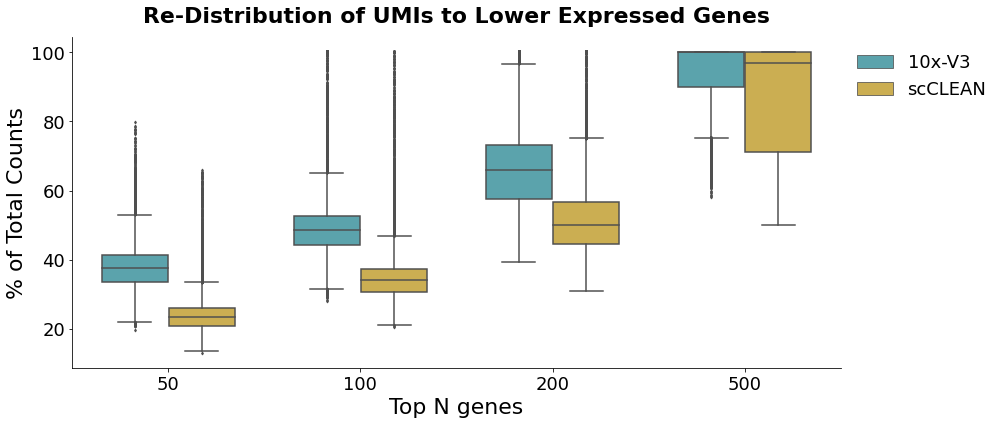

In [4]:
#combine dataframes and plot 
merged = pd.concat([std_df2, dep_df2])

fig, axes = plt.subplots(figsize=(14,6))
sns.boxplot(data=merged, x='Column Name', y='Value', hue='Condition', ax = axes, width=.7,
             palette=['#4EADB9','#DFB93E'], fliersize=2)

right_side = axes.spines["right"]
right_side.set_visible(False)
top = axes.spines["top"]
top.set_visible(False)

x = [0,1,2,3]
labels = ['50', '100', '200', '500']
plt.xticks(x, labels, fontsize=18)
plt.yticks(fontsize=18)

plt.title('Re-Distribution of UMIs to Lower Expressed Genes', fontweight="bold", fontsize=22, pad=15)
plt.ylabel('% of Total Counts', fontsize=22)
plt.xlabel('Top N genes', fontsize=22, )
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=18, frameon=False)
plt.tight_layout()
plt.savefig('MAS_seq_data/Boxplot_all_pct_counts_in_top_N_genes_MASseq.png', dpi=300)
plt.show()

Azimuth performance metrics

In [5]:
#dataframe comparing cells and azimuth score
std = pd.read_csv('MAS_seq_data/ms_control_cell_labels.csv')
std = std.set_index('Unnamed: 0')
std = std[std['scmap_clusters'] != 'Doublet']

#quantify performance
counts = pd.DataFrame(std['cm'].value_counts())
counts['counts'] = counts['cm']
counts['ROC_mean'] = std.groupby('cm').roc.mean()
counts['probs_median'] = std.groupby('cm').probs.median()
counts['Azimuth'] = counts.index
counts['Condition'] = '10x-V3'
counts

,cm,counts,ROC_mean,probs_median,Azimuth,Condition
CD14 Mono,6770,6770,0.869129,0.772085,CD14 Mono,10x-V3
CD4 Naive,6375,6375,0.588549,0.678682,CD4 Naive,10x-V3
CD8 Naive,2713,2713,0.745669,0.683871,CD8 Naive,10x-V3
NK,2410,2410,0.493776,0.679656,NK,10x-V3
CD16 Mono,2115,2115,0.995272,0.800243,CD16 Mono,10x-V3
CD4 TCM,2004,2004,0.366766,0.696177,CD4 TCM,10x-V3
MAIT,1650,1650,0.301212,0.658168,MAIT,10x-V3
B naive,1482,1482,0.400135,0.698241,B naive,10x-V3
CD8 TEM,1320,1320,0.375000,0.669291,CD8 TEM,10x-V3
cDC2,612,612,0.888889,0.833504,cDC2,10x-V3


In [6]:
#dataframe comparing cells and azimuth score
dep = pd.read_csv('MAS_seq_data/ms_depleted_cell_labels.csv')
dep = dep.set_index('Unnamed: 0')
dep = dep[dep['scmap_clusters'] != 'Doublet']

#quantify performance
counts_dep = pd.DataFrame(dep['cm'].value_counts())
counts_dep['counts'] = counts_dep['cm']
counts_dep['ROC_mean'] = dep.groupby('cm').roc.mean()
counts_dep['probs_median'] = dep.groupby('cm').probs.median()
counts_dep['Azimuth'] = counts_dep.index
counts_dep['Condition'] = 'scCLEAN'
counts_dep

,cm,counts,ROC_mean,probs_median,Azimuth,Condition
CD14 Mono,6554,6554,0.891517,0.685226,CD14 Mono,scCLEAN
CD4 Naive,5592,5592,0.585122,0.539109,CD4 Naive,scCLEAN
CD8 Naive,3036,3036,0.820158,0.549750,CD8 Naive,scCLEAN
CD16 Mono,2178,2178,0.987144,0.713811,CD16 Mono,scCLEAN
NK,1798,1798,0.626251,0.611679,NK,scCLEAN
CD4 CTL,1780,1780,0.281461,0.572855,CD4 CTL,scCLEAN
CD4 TCM,1715,1715,0.532945,0.546467,CD4 TCM,scCLEAN
MAIT,1548,1548,0.386951,0.533850,MAIT,scCLEAN
B naive,1449,1449,0.422360,0.612542,B naive,scCLEAN
cDC2,520,520,0.955769,0.744992,cDC2,scCLEAN


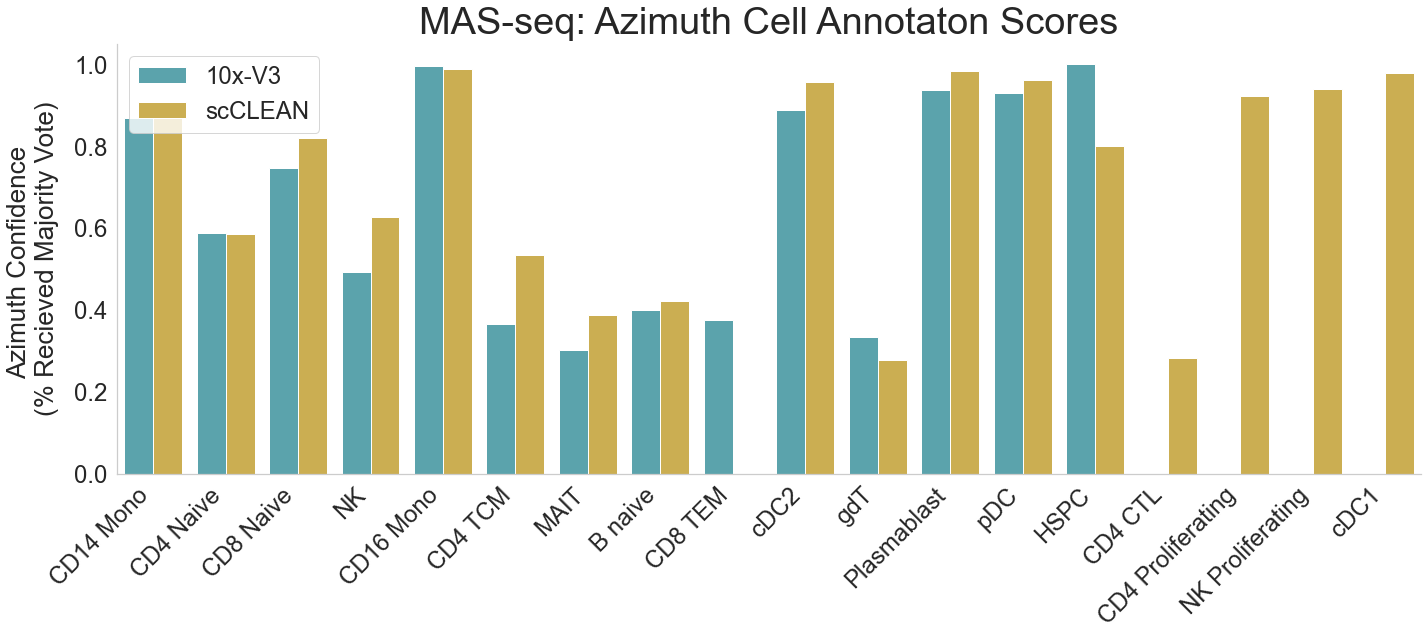

In [7]:
#merge and plot the comparison
merged = pd.concat([counts, counts_dep])
sns.set(rc={'figure.figsize':(20,9)})
sns.set_style('whitegrid', {'axes.grid' : False})

ax = sns.barplot(x='Azimuth', y='ROC_mean', hue='Condition', data=merged, palette=['#4EADB9','#DFB93E'])
ax.spines[['right', 'top']].set_visible(False)

plt.yticks(fontsize=24)
plt.xticks(rotation = 45, ha='right', fontsize=24)
plt.xlabel('')
plt.ylabel('Azimuth Confidence \n(% Recieved Majority Vote)', fontsize=26, labelpad=15)
plt.legend(loc='best', fontsize=24)
plt.title('MAS-seq: Azimuth Cell Annotaton Scores', fontsize=38, pad=10)
plt.tight_layout()
merged.to_csv('MAS_seq_data/Azimuth_Comparison__MASseq_Confidence_metrics.csv')
plt.savefig('MAS_seq_data/Azimuth_Comparison__MASseq_Confidence_barplot.png', dpi=300)
